In [2]:
import numpy as np
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import gc

In [3]:
runs = 5

In [4]:
def lognorm(x,mu,sigma):
    sigma = float(sigma)
    mu = float(mu)
    x = float(x)
    exp = -((np.log(x)-mu)**2/(2*sigma**2))
    front = 1/(x*sigma*np.sqrt(2*np.pi))
    return front*np.exp(exp)

/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


0.2997999916150706


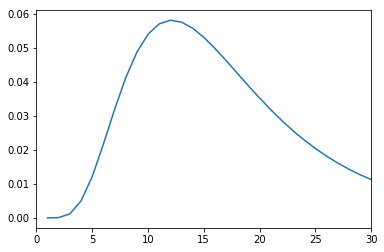

'\nplt.figure()\nplt.plot(x_list,log)\nplt.xlim([0,1000])\nplt.show()\n'

In [22]:
#fast_leave = 1193. #Minimum days to leave dust cloud
x_list = np.linspace(0,1500,1500)

mean = 20.
sigma = 0.5
mu = np.log(mean) - 1/2.*sigma
log = []
for i in range(len(x_list)):
    log.append(lognorm(x_list[i],mu,sigma))
    
print np.nansum(log)*1500/5000.

plt.figure()
plt.plot(x_list,log)
plt.xlim([0,30])
plt.show()
'''
plt.figure()
plt.plot(x_list,log)
plt.xlim([0,1000])
plt.show()
'''

In [5]:
data = np.loadtxt('NOVEMBER/NOV-NGC3783-K')
error = np.loadtxt('NOVEMBER/NGC3783_NOISE_K.txt')
#data[:,0] = data[:,0] - min(data[:,0])
#error[:,0] = float(int(error[:,0]))

In [6]:
print data[:,0]
print data[:,1]
#print error[:,0]
print error[:,1]


[57516. 57523. 57530. 57547. 57554. 57562. 57569. 57583. 57598. 57693.
 57701. 57711. 57719. 57726. 57733. 57741. 57749. 57757. 57764. 57772.
 57786. 57794. 57801. 57809. 57817. 57864. 57878. 57887. 57894. 57903.
 57910. 57918. 57925. 57933. 57942. 57942. 57949. 57956. 58055. 58062.
 58070. 58079. 58086. 58094.]
[6.53724662e-15 6.68657641e-15 6.71527344e-15 6.60099894e-15
 6.37713900e-15 6.66855803e-15 6.67181077e-15 6.40972481e-15
 6.56864377e-15 6.57594350e-15 6.74248785e-15 6.98912737e-15
 7.06941435e-15 7.16508274e-15 7.45461953e-15 7.60092634e-15
 7.60039417e-15            nan 8.05099584e-15 7.98610860e-15
 8.21301406e-15 8.22193811e-15 8.25153761e-15            nan
 8.38115563e-15            nan 9.19988661e-15 9.20615762e-15
 9.29548448e-15 9.44518380e-15 9.50857590e-15 9.73722913e-15
 9.80940383e-15 9.78447827e-15            nan            nan
 9.85013975e-15 9.76320384e-15 9.45886211e-15 9.26290708e-15
 9.16831540e-15 9.11523113e-15 9.00052668e-15 9.08440971e-15]
[1.59502546e-1

In [7]:
delta_F_l = data[:,1] - np.nanmean(data[:,1])
L = delta_F_l/error[:,1]


In [11]:
cont_days = np.arange(min(data[:,0])-600.,max(data[:,0]),1)
print np.shape(cont_days)
cont = np.zeros((len(cont_days),3))
cont[:,0] = cont_days
cont[:,1] = np.nanmean(data[:,1])
data_comp = np.zeros((len(data[:,1]),3))
data_comp[:,0] = data[:,0]
data_comp[:,1] = data[:,1]
data_comp[:,2] = np.nanmean(data[:,1])

(1178,)


In [ ]:
chi1 = 1e10000
for i in range(runs):
    print i
    for j in range(len(cont_days)):
        data_comp[:,2] = 0
        place1 = randint(0,len(cont_days))
        place2 = randint(0,len(cont_days))
        place3 = randint(0,len(cont_days))
        place4 = randint(0,len(cont_days))
        place5 = randint(0,len(cont_days))
        change = (-1)**randint(0,2)*cont[j,1]*random.random()*0.05
        change1 = (-1)**randint(0,2)*cont[place1,1]*random.random()*0.05
        change2 = (-1)**randint(0,2)*cont[place2,1]*random.random()*0.05
        change3 = (-1)**randint(0,2)*cont[place3,1]*random.random()*0.05
        change4 = (-1)**randint(0,2)*cont[place4,1]*random.random()*0.05
        change5 = (-1)**randint(0,2)*cont[place5,1]*random.random()*0.05
        cont[j,1] += change
        cont[place1,1] += change1
        cont[place2,1] += change2
        cont[place3,1] += change3
        cont[place4,1] += change4
        cont[place5,1] += change5
        h = 0
        #print 'j = ', j
        for h in range(len(data_comp[:,0])):
            for k in range(len(cont_days)):
                if cont_days[k] < data_comp[h,0]:
                    data_comp[h,2] += cont[k,1]*log[abs(int((cont[k,0]-data_comp[h,0])))] #int((cont[k,0]-data_comp[h,0])/10.)
                    #print 'yes'
            #print 'k = ', k
        #print data_comp[:,2]
        chi2 = np.nansum((data_comp[:,1] - data_comp[:,2])**2)
        #print chi2, chi1
        if chi2 >= chi1:
            #print 'YES'
            cont[j,1] -= change
            cont[place1,1] -= change1
            cont[place2,1] -= change2
            cont[place3,1] -= change3
            cont[place4,1] -= change4
            cont[place5,1] -= change5
        elif chi2 < chi1:
            #print chi2 - chi1
            chi1 = chi2
        gc.collect()
    gc.collect()

0
1
2
3


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(cont[:,0],cont[:,1])
plt.scatter(data[:,0],data[:,1])
plt.scatter(data_comp[:,0],data_comp[:,2])
plt.ylim([1e-15,2e-14])
plt.yscale('log')
plt.show()

print cont[:,1]

In [25]:
x = -1
if x == 0 or x > 0:
    print x